In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import healpy as hp

In [2]:
baseline_file = '/Users/yoachim/runs31/starter/baseline_v2.0_10yrs.db' #get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
outDir = "temp"
resultsDb = maf.db.ResultsDb(out_dir=outDir)


In [3]:

nside = 64
bundleList = []
sql = ""
# Let's plug in the magnitudes for one type
metric = maf.maf_contrib.NYoungStarsMetric(return_distance=True)

print("Metric is looking for YSO with the following absolute magnitudes", metric.mags)

slicer = maf.slicers.HealpixSlicer(nside=nside, use_cache=False)

summaryStats = [maf.metrics.SumMetric(), maf.metrics.MaxMetric()]
plotDict = {"logScale": True, 'figsize': (8, 6), "colorMin": 1, #"colorMax":1e5, 
            "cbarFormat":'%.0e'}
bundleList.append(
    maf.metricBundles.MetricBundle(
        metric, slicer, sql, plot_dict=plotDict, summary_metrics=summaryStats, run_name=run_name
    )
)


Metric is looking for YSO with the following absolute magnitudes {'g': 10.32, 'r': 9.28, 'i': 7.97}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Read map /Users/yoachim/rubin_sim_data/maps/DustMaps3D/merged_ebv3d_nside64_defaults.fits from disk


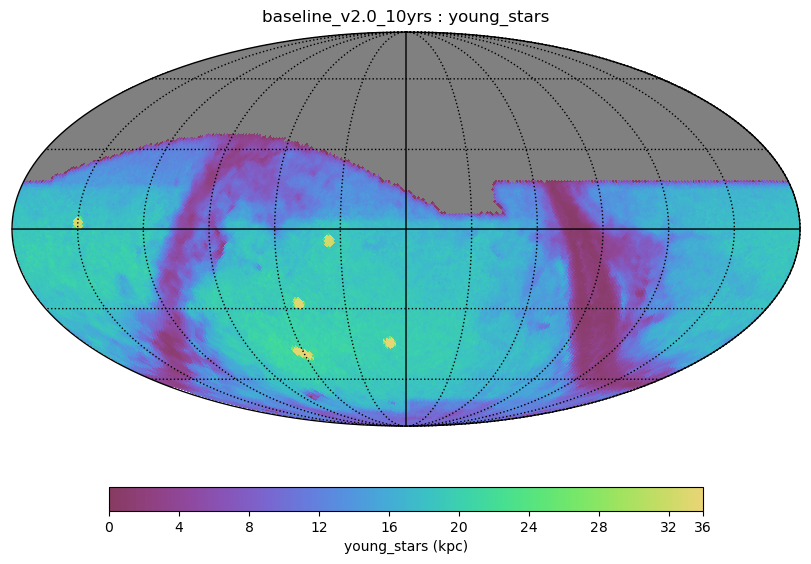

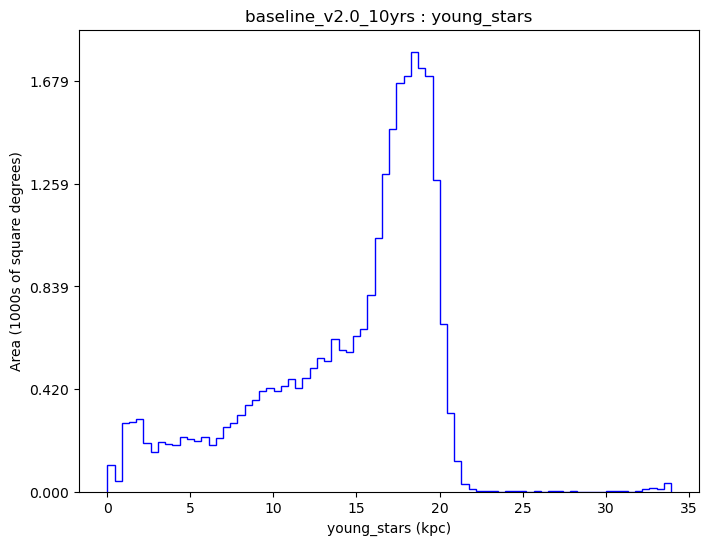

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=outDir, results_db=resultsDb)
bg.run_all()
bg.plot_all(closefigs=False)


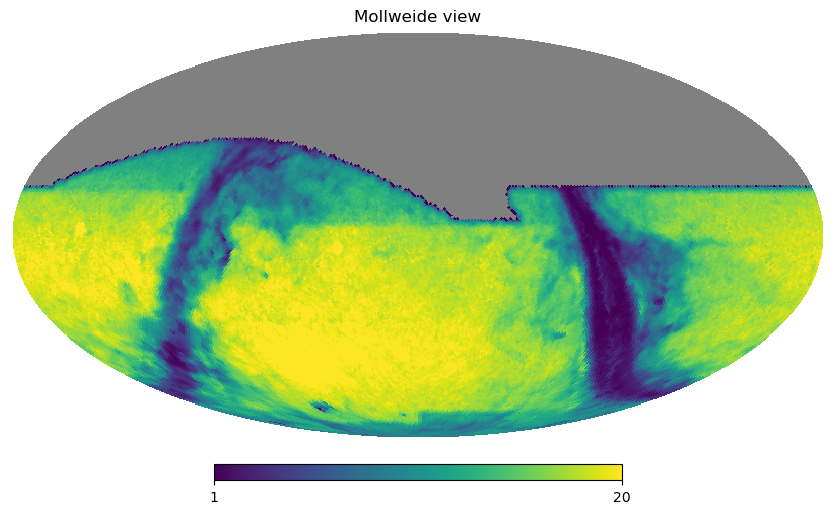

In [5]:
hp.mollview((bundleList[0].metric_values), max=20, min=1)
res1 = bundleList[0].metric_values.copy()

In [6]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
outDir = "temp"
resultsDb = maf.db.ResultsDb(out_dir=outDir)


Metric is looking for YSO with the following absolute magnitudes {'g': 10.32, 'r': 9.28, 'i': 7.97}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


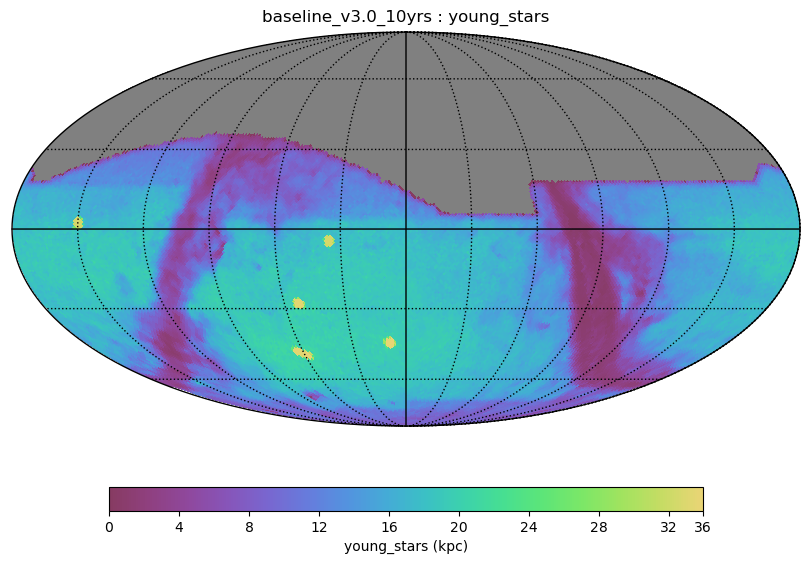

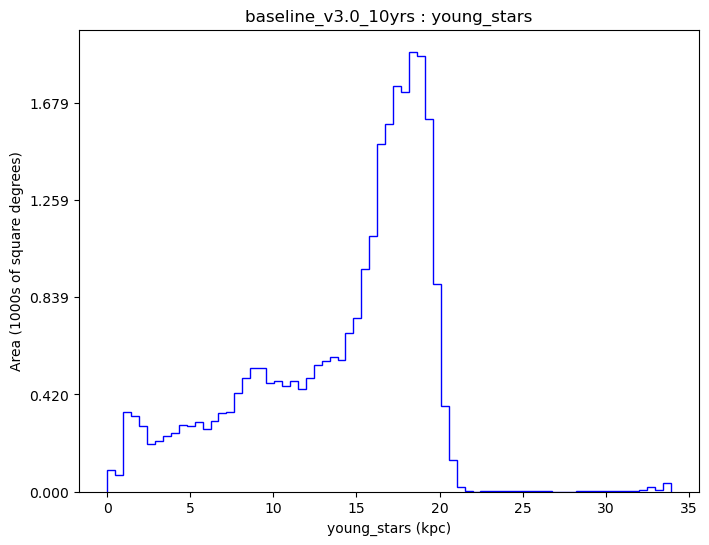

In [7]:

nside = 64
bundleList = []
sql = ""
# Let's plug in the magnitudes for one type
metric = maf.maf_contrib.NYoungStarsMetric(return_distance=True)

print("Metric is looking for YSO with the following absolute magnitudes", metric.mags)

slicer = maf.slicers.HealpixSlicer(nside=nside, use_cache=False)

summaryStats = [maf.metrics.SumMetric(), maf.metrics.MaxMetric()]
plotDict = {"logScale": True, 'figsize': (8, 6), "colorMin": 1, #"colorMax":1e5, 
            "cbarFormat":'%.0e'}
bundleList.append(
    maf.metricBundles.MetricBundle(
        metric, slicer, sql, plot_dict=plotDict, summary_metrics=summaryStats, run_name=run_name
    )
)

bd = maf.metricBundles.make_bundles_dict_from_list(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=outDir, results_db=resultsDb)
bg.run_all()
bg.plot_all(closefigs=False)


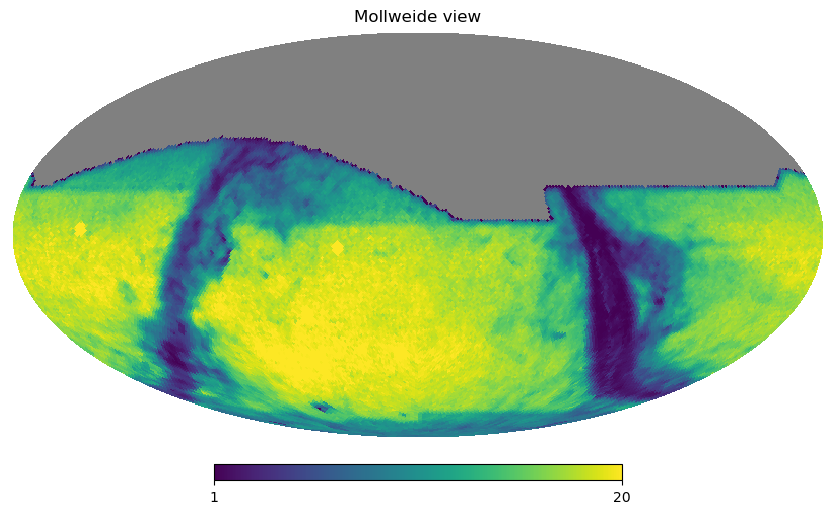

In [9]:
hp.mollview((bundleList[0].metric_values), max=20, min=1)
res2 = bundleList[0].metric_values.copy()

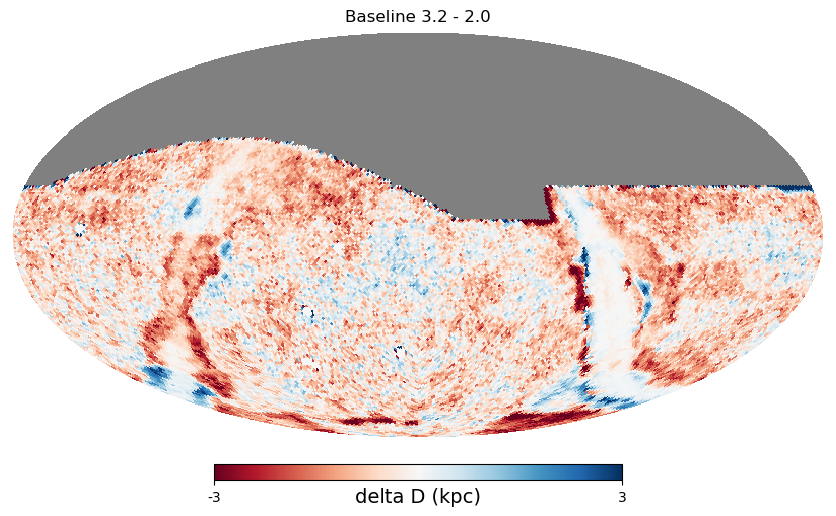

In [17]:
hp.mollview(res2-res1, min=-3, max=3, cmap='RdBu', title='Baseline 3.2 - 2.0', unit='delta D (kpc)')